# Audiotechnik I: Raumakustik, SoSe 2022
#### Prof. Dr. Stefan Weinzierl
## Hausaufgabe I

## Hinweise

Abzugeben ist eine Jupyter Notebook Datei mit Text und Python Code einschließlich daraus erzeugten Abbildungen. Achten Sie darauf, dass alle formalen Anforderungen eines wissenschaftlichen Textes (Literaturverweise, gut beschriftete Abbildungen etc.) erfüllt sind und dass der Code gut dokumentiert und ausführbar ist. 

Abgabetermin ist Sonntag, 29. Mai (23:55 Uhr). Das Notebook mitsamt aller Dateien, die zum Ausführen des Notebooks notwendig sind, soll als ipynb-Datei mit der Namenskonvention 'Gruppe_Gruppennummer_Hausaufgabe_1.ipynb' bei ISIS hochgeladen werden. Nach 23:55 Uhr schließt die Uploadoption, verspätete Abgaben werden nicht berücksichtigt.


In [1]:
# Zur Lösung der Hausaufgabe können folgende Module verwendet werden

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pyfar as pf
import IPython.display as ipd

## Aufgabe 1

Erzeugen Sie eine Bandpass-Filterbank für akustische Analysen in Oktavbändern mit Mittenfrequenzen von 125 Hz bis 8 kHz. Verwenden Sie Butterworth-Filter 10. Ordnung und eine Filterstruktur mit einer Serie von Biquad-Filtern (second order sections). Zeigen Sie exemplarisch, dass im Oktavband mit fm = 1 kHz die Anforderungen der DIN EN 61260-1 für Oktavfilter der Klasse 1 erfüllt sind, indem Sie den Amplitudengang des Filters und die Toleranzgrenzen der DIN plotten.
(5 Punkte)

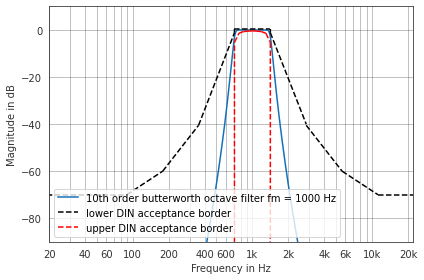

In [2]:
# Loesung Aufgabe 1

# %matplotlib qt
fs = 44100
dirac = pf.signals.impulse(2**17, sampling_rate=44100)
filterBank = pf.dsp.filter.fractional_octave_bands(dirac, 1, sampling_rate=None, freq_range=(125.0, 8000.0), order=10)

pf.plot.freq(filterBank[3], label='10th order butterworth octave filter fm = 1000 Hz')

f1 = 1000*(10**0.3)**-0.5
#print(f1)
f2 = 1000*(10**0.3)**0.5

#Mittenfrequenzen
fms = np.zeros(9)
for j, i in enumerate(range(-4, 5)):
    fms[j] = 1000*(10**0.3)**((2*i + 1)/2)

#uneven mid freqs for upper border
fms_uneven = np.zeros(6)
partials = [(-3/8), (-1/4), (-1/8), (1/8), (1/4), (3/8)]
for j, i in enumerate(partials):
    fms_uneven[j] = 1000*(10**0.3)**(partials[j])

# plot the lower border border of DIN EN 61260
plt.plot([0, fms[0]], [-70, -70], label='lower DIN acceptance border', color='k', linestyle='dashed')
plt.plot([fms[0], fms[1]], [-70, -60], [fms[1], fms[2]], [-60, -40.5], [fms[2], (f1 - 0.01)], [-40.5, -1.2], [(f1 - 0.01), f1], [-1.2, 0.4], [f1, (f2 - 0.01)], [0.4, 0.4], [(f2 - 0.01), f2], [0.4, -1.2], [f2, fms[5]], [-1.2, -40], [fms[5], fms[6]], [-40.5, -60], [fms[6], fms[7]], [-60, -70], [fms[7], len(filterBank.freq.T)], [-70, -70], color='k', linestyle='dashed')
# plot the upper border border of DIN EN 61260
plt.plot([(f1 - 0.01), f1],[-90, -5.3], label='upper DIN acceptance border', color='r', linestyle='dashed')
plt.plot([f1, fms_uneven[0]], [-5.3, -1.4], [fms_uneven[0], fms_uneven[1]], [-1.4, -0.7], [fms_uneven[1], fms_uneven[2]], [-0.7, -0.5], [fms_uneven[2], 1000], [-0.5, -0.4], [1000, fms_uneven[3]], [-0.4, -0.5], [fms_uneven[3], fms_uneven[4]], [-0.5, -0.7], [fms_uneven[4], fms_uneven[5]], [-0.7, -1.4], [fms_uneven[5], (f2 - 0.01)], [-1.4, -5.3], [(f2 - 0.01), f2], [-5.3, -90], color='r', linestyle='dashed')

plt.legend(loc='lower left')

# interactive plot so you can zoom in
plt.show()



## Aufgabe 2

fm = 1000
delta_a = A - A_ref
Grenzfrequenzen Durchlassbereich: 

a. Laden Sie die Impulsantwort „RIR_Vicenza“.
Berechnen Sie die mit der oben erzeugten Filterbank die bandpassgefilterten Impulsantworten und plotten diese als quadrierte und auf den Maximalwert als 0 dB-Punkt normierte und logarithmierte Kurven. Die folgenden Berechnungsschritte sollen für jedes Oktavband durchgeführt werden. Die Berechnung entspricht einer leicht vereinfachten Version des in 

Lundeby, A., Vigran, T. E., Bietz, H., & Vorländer, M. (1995). Uncertainties of measurements in room acoustics. Acta Acustica united with Acustica, 81(4), 344-355.

beschriebenen Vorgehens. (2 Punkte)

Text(0.5, 0, 'Time / s')

<Figure size 432x288 with 0 Axes>

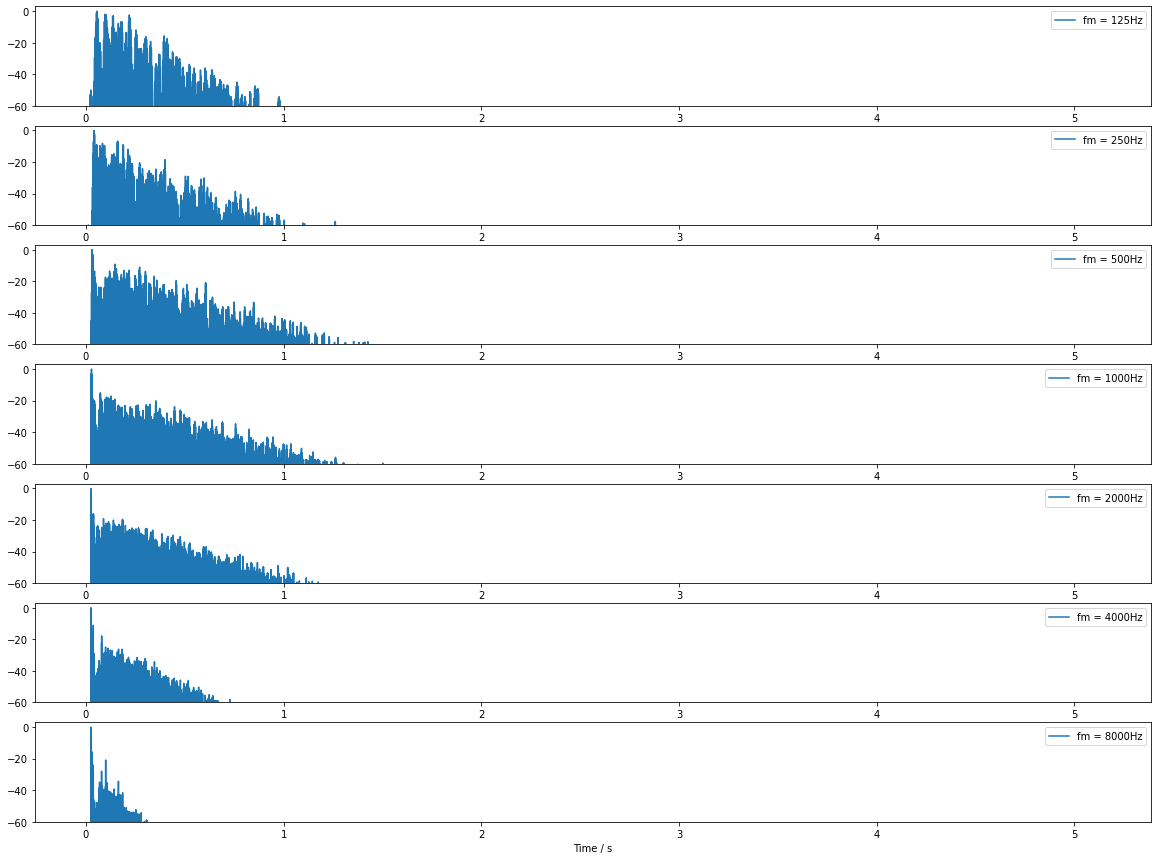

In [10]:
# Loesung Aufgabe 2a

# %matplotlib notebook
# Loesung Aufgabe 2a
filters = []
y = []
fm = [125,250,500,1000,2000,4000,8000]
borderfreqs = []
for i in fm:
    borderfreqs.append(i /np.sqrt(2))
borderfreqs.append(8000*np.sqrt(2))
dirac = pf.signals.impulse(len(pf.io.read_audio('audio/RIR_Vicenza.wav').time.T), sampling_rate=44100)
for i in range(7):
    filters.append(pf.dsp.filter.butterworth(None,10,[borderfreqs[i],borderfreqs[i+1]],'bandpass',sampling_rate=44100))
    y.append(filters[-1].process(dirac))


fig = plt.figure()
fig, ax = plt.subplots(7,1, figsize=(20,15))
RIR = pf.io.read_audio('audio/RIR_Vicenza.wav')
fs = RIR.sampling_rate
RIR_list_log = []
RIR_list_sq = []
for i in range(len(filters)):
    RIR_filtered = filters[i].process(RIR)
    RIR_sq = RIR_filtered.time**2
    RIR_sq = RIR_sq.T[:,0]
    RIR_sq_norm = RIR_sq/np.max(RIR_sq)
    RIR_sq_norm_log = 20 * np.log10(RIR_sq_norm)
    RIR_list_log.append(RIR_sq_norm_log)
    RIR_list_sq.append(RIR_sq)
    time = np.linspace(0,len(RIR_sq_norm_log)/fs,len(RIR_sq_norm_log))
    #fig.add_axes([0,1.2*i,5,1],pf.plot.time(RIR_filtered[i]), label=str(i))
    #fig.add_axes([0,1.2*i,5,1],plt.plot(RIR_sq_norm_log))
    plotlabel = 'fm = ' +str(125*(2**i))+'Hz'
    ax[i].plot(time, RIR_sq_norm_log, label = plotlabel)
    ax[i].set_ylim(-60,3)
    ax[i].legend()
ax[6].set_xlabel('Time / s')

#pf.plot.time(RIR_filtered[0])


b. Berechnen Sie geglättete und wiederum normierte Versionen der quadrierten Impulsantwort als gleitenden Mittelwert mit einem Rechteckfenster von 50 ms Länge und Normierung auf das Maximum der geglätteten Kurve (0 dB-Punkt). Plotten Sie diese für die sieben Oktavbänder. (2 Punkte)

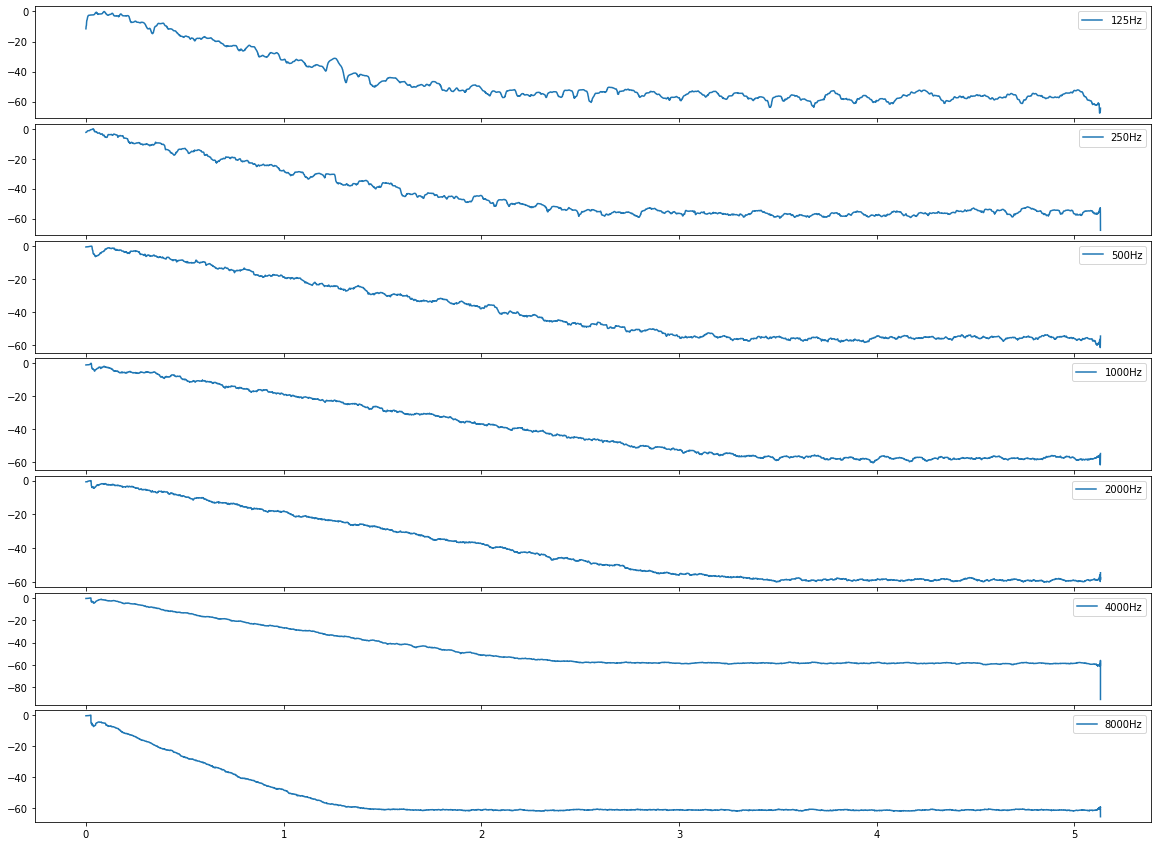

In [8]:
# Loesung Aufgabe 2b
t50ms = int(fs/20)
fig, ax = plt.subplots(7,1, figsize=(20,15))
RIR_flat = []
for j in range(len(filters)):
    flattened = []
    for i in range(len(RIR_list_sq[j]-t50ms)):
        flattened.append(np.mean(RIR_list_sq[j][i:t50ms+i]))
    flattened = 10*np.log10(flattened/max(flattened))
    RIR_flat.append(flattened)
    time = np.linspace(0,len(RIR_sq_norm_log)/fs,len(flattened))
    ax[j].plot(time,flattened, label=str(125*2**j)+'Hz')
    ax[j].legend(loc='upper right')

fig.subplots_adjust(hspace=.05)
#warning: this takes some time... <1 min

c. Bestimmen Sie den Anfangspunkt der Impulsantworten als das Maximum der geglätteten Kurve und das Ende der Impulsantwort als Schnittpunkt einer initialen Schätzung der Steigung der geglätteten Kurve mit dem Noise Floor. Die Steigung soll als lineare Regressions zwischen dem Maximum der geglätteten Kurve und einem Punkt 10 dB oberhalb des Noise Floors berechnet werden, der Noise Floor als energetischer Mittelwert über die letzten 10 % der Impulsantwort. Markieren Sie Anfangs- und Endpunkt in der Darstellung der Kurven. (3 Punkte)

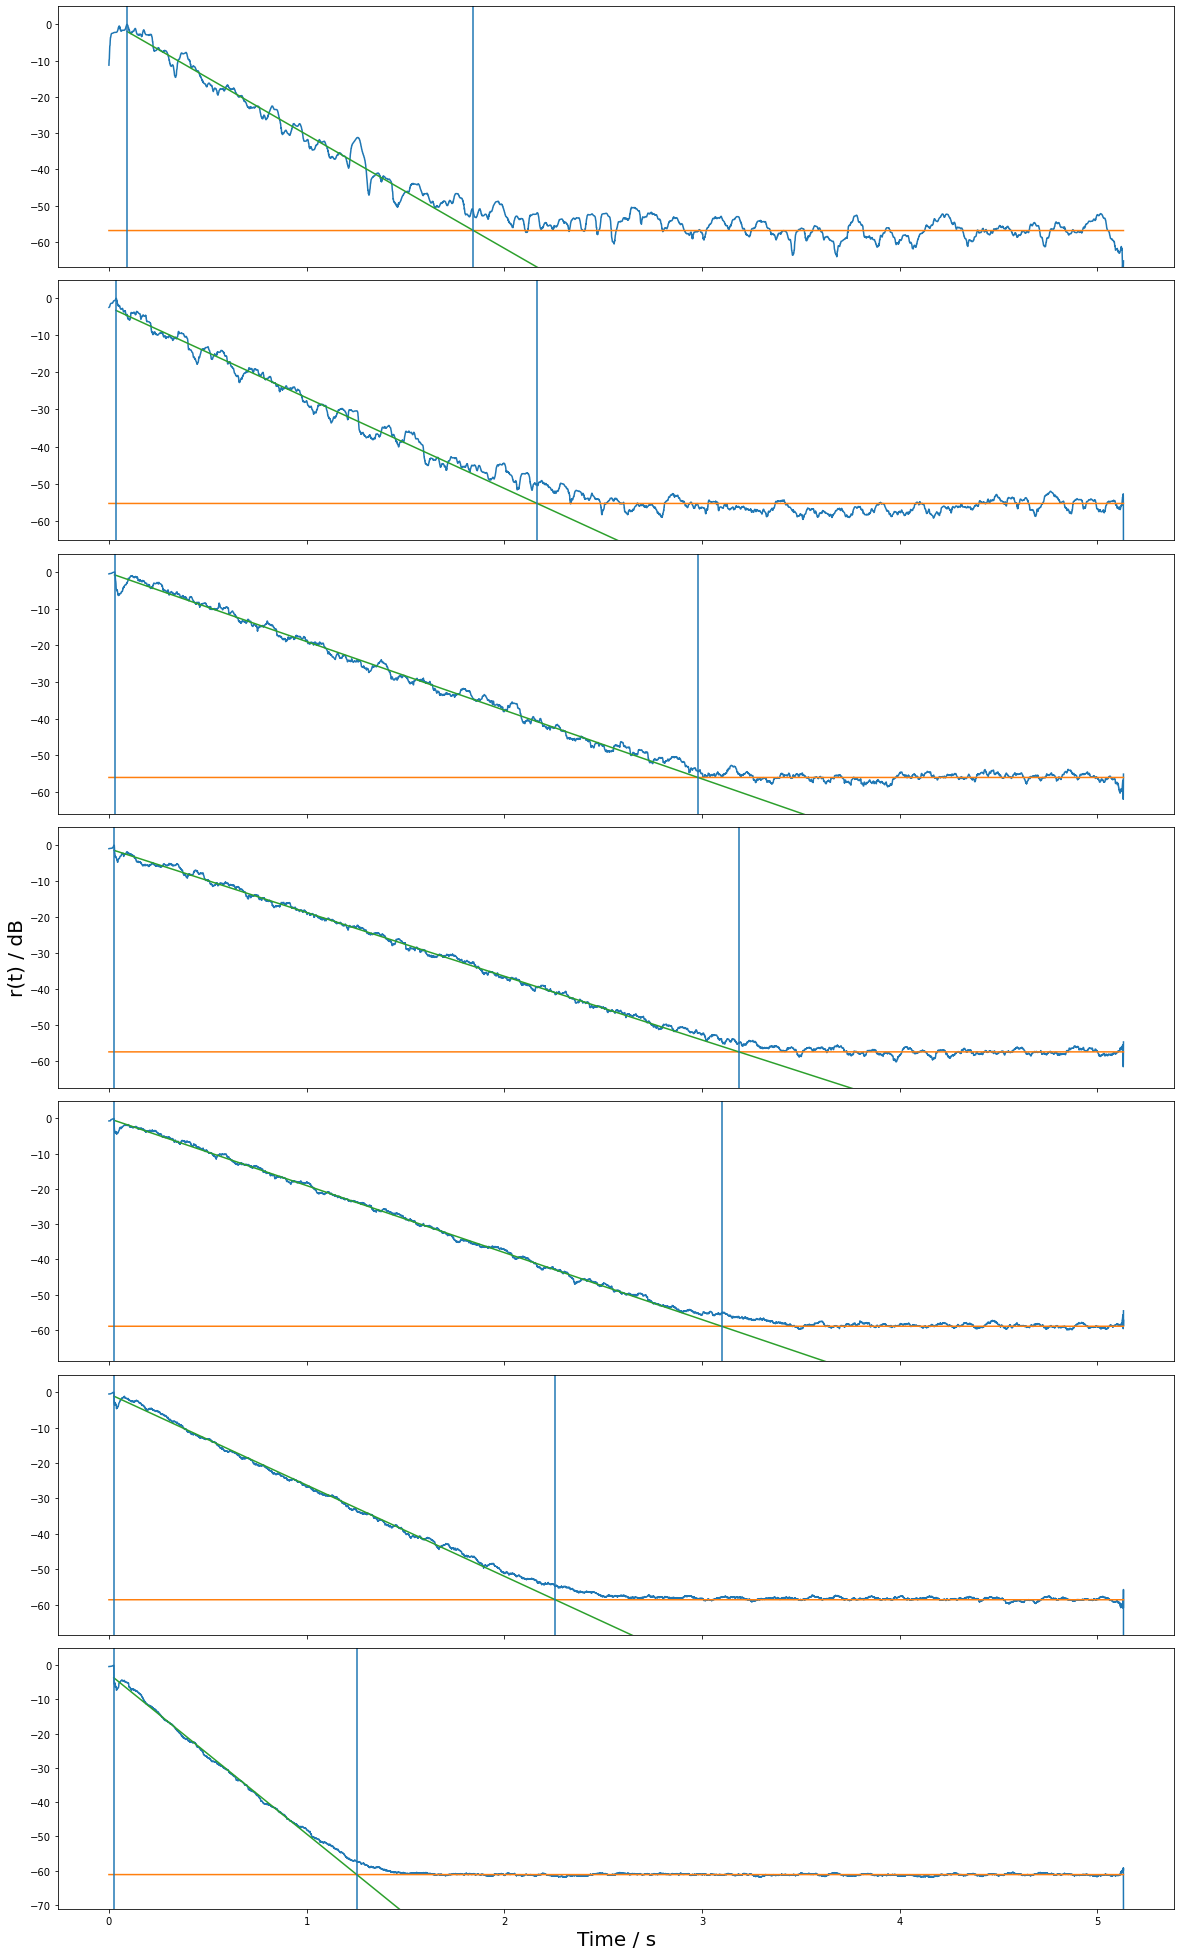

In [5]:
# Loesung Aufgabe 2c
last10percent = []
noisefloor = []
crossing = [] #crossing points of noisefloor and regression
m_n = [[], []] #array for storing regression parameters
starts = []
stops = []
fig, ax = plt.subplots(7,1, figsize=(20,35), sharex=True,)
for i in range(len(RIR_flat)):
    start = np.argmax(RIR_flat[i])
    starts.append(start)
    z = int(0.9*len(RIR_flat[i]))
    last10percent.append(RIR_flat[i][z:])
    noisefloor.append(np.mean(last10percent[i]))
    ax[i].plot(time,RIR_flat[i])
    ax[i].plot(time,noisefloor[-1]*np.ones(len(time)))
    stop = list(map(int,RIR_flat[i].tolist())).index(int(noisefloor[i]+10))
    stops.append(stop)
    m, n = np.polyfit(x=time[start:stop],y=RIR_flat[i][start:stop],deg=1)
    m_n[0].append(m)
    m_n[1].append(n)
    ax[i].plot(time[start:stop*2],m*time[start:stop*2]+n)
    ax[i].set_ylim(noisefloor[i]-10,5)
    ax[i].axvline(time[start])
    crossing.append((noisefloor[i]-n)/m)
    ax[i].axvline(crossing[i])

ax[3].set_ylabel('r(t) / dB', fontsize = 20.0)
ax[6].set_xlabel('Time / s', fontsize = 20.0)
fig.subplots_adjust(hspace=.05)


d. Berechnen Sie für jede dieser Kurven eine Kompensationsenergie Ecomp für den durch den Noise Floor verdeckten Teil des Ausklangs nach Lundeby et al. (1995, S. 347f.) (3 Punkte)

In [6]:
# Loesung Aufgabe 2d
E_comp = []
for i in range(len(RIR_flat)):
    y = m_n[0][i]*time[stops[i:]]+m_n[1][i]
    y_nolog = 10**(0.1*y)
    E_comp.append(np.sum(y_nolog))
    print('E_comp = '+str(round(E_comp[i]*10**3,3))+' * 10^-3 bei '+str(125*2**i)+' Hz')

E_comp = 0.683 * 10^-3 bei 125 Hz
E_comp = 1.528 * 10^-3 bei 250 Hz
E_comp = 9.938 * 10^-3 bei 500 Hz
E_comp = 10.758 * 10^-3 bei 1000 Hz
E_comp = 9.676 * 10^-3 bei 2000 Hz
E_comp = 1.641 * 10^-3 bei 4000 Hz
E_comp = 0.006 * 10^-3 bei 8000 Hz


e. Berechnen Sie unter Verwendung des oben ermittelten Anfangs- und Endpunkts der Impulsantwort und der Kompensationsenergie Ecomp die Decay Curve als Rückwärtsintegration der quadrierten Impulsantwort (Schroeder-Integral). Plotten Sie diese für die sieben Oktavbänder. (2 Punkte)

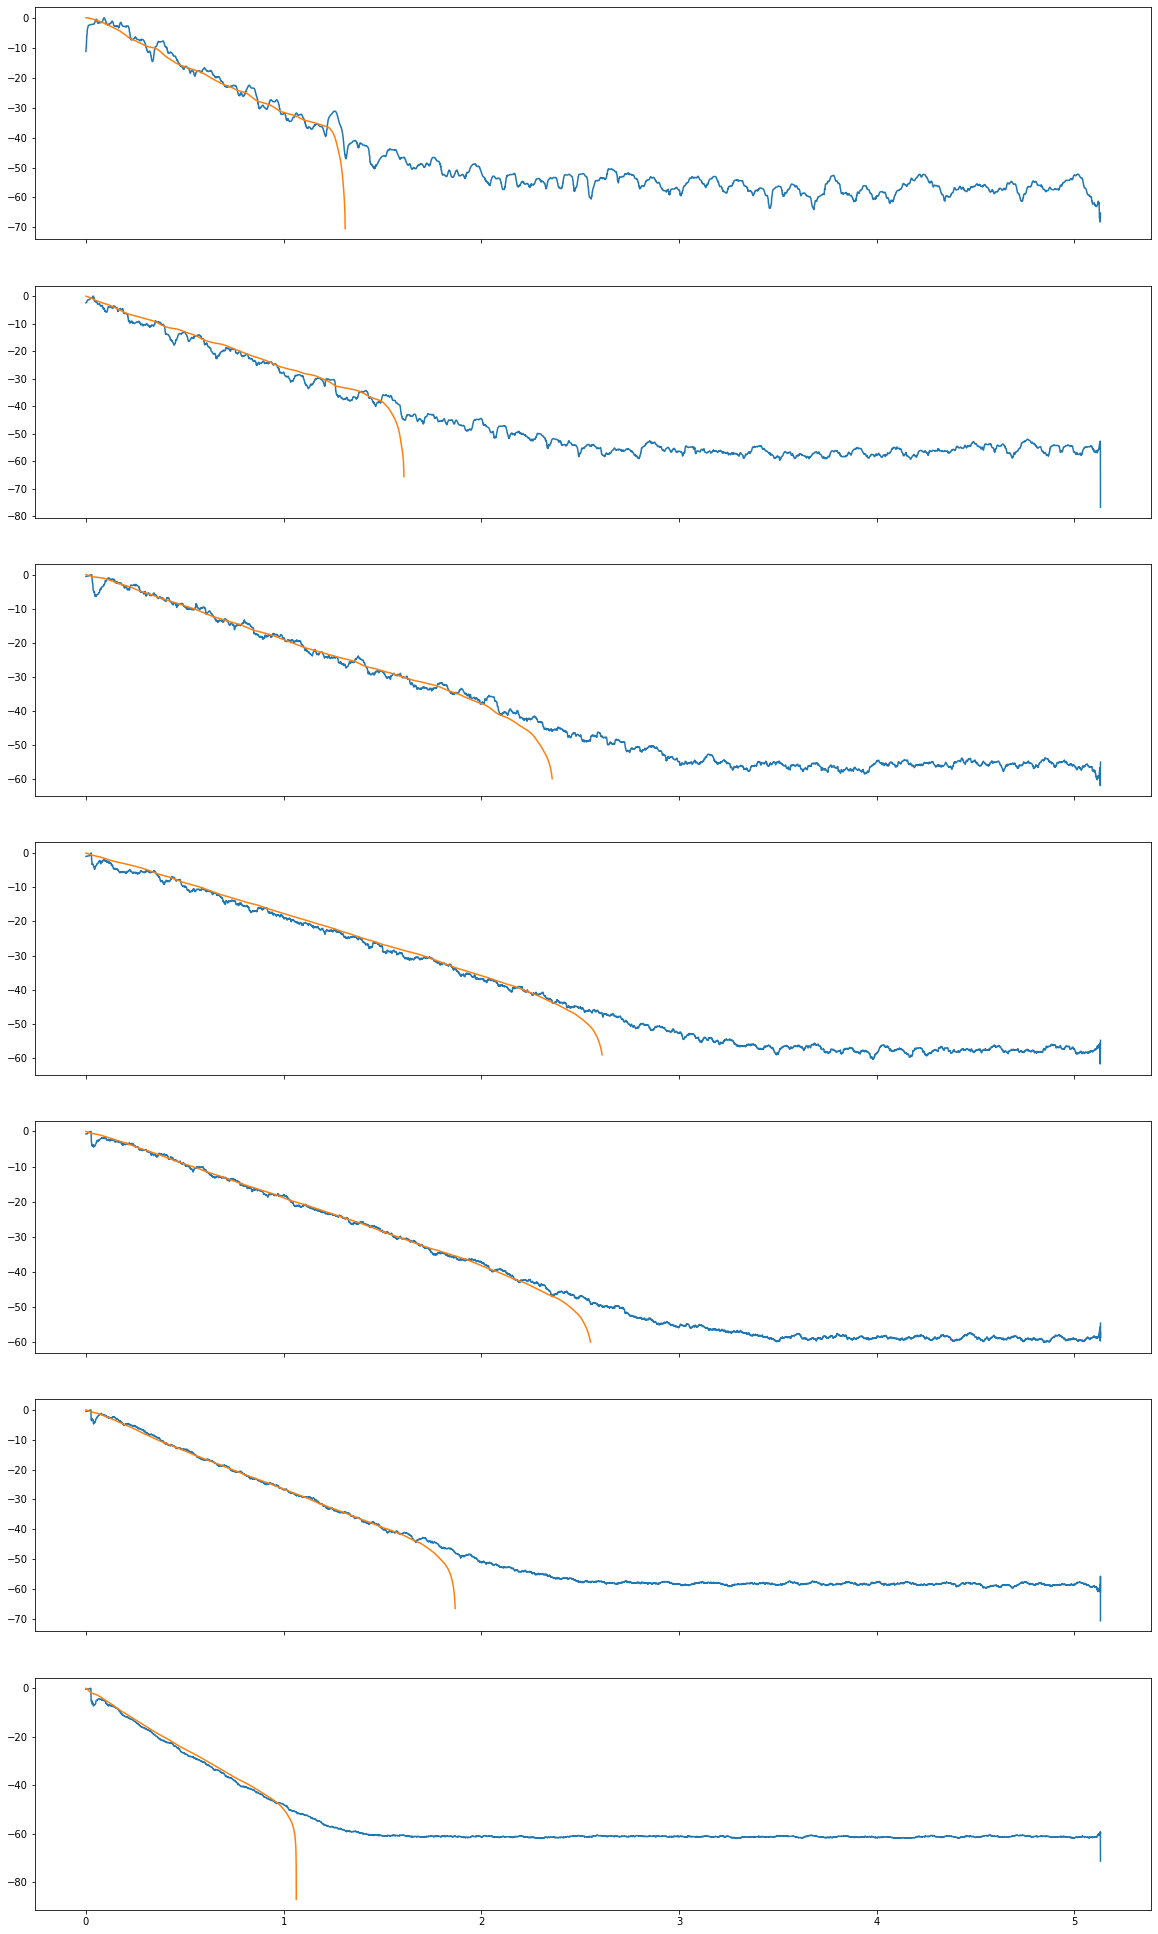

In [7]:
# Loesung Aufgabe 2e
fig, ax = plt.subplots(7,1, figsize=(20,35), sharex=True,)
schroeder = []
schroeder_log = []
for i in  range(len(RIR_flat)):
    reverseRIR = 10**(0.1*np.flip(RIR_flat[i][:stops[i]])) #reverse order of RIR array, and calculating the anti log lol
    schroeder.append([E_comp[i]])
    schroeder_log.append([])
    for j in range(1,len(reverseRIR)+1):
        schroeder[i].append(schroeder[i][j-1]+reverseRIR[j-1])
    schroeder_log[i] = np.flip(10*np.log10(schroeder[i])-max(10*np.log10(schroeder[i]))) #calculating the log of the schroeder integral, normalize it and reversing it again
    ax[i].plot(time, RIR_flat[i])
    ax[i].plot(time[:stops[i]+1], schroeder_log[i])

f. Bestimmen Sie in Oktavbändern die Nachhallzeiten T10, T20 und T30 aus den Decay Curves als Steigung einer linearen Regressionsgeraden zwischen den in ISO 3382:2008 definierten Anfangs- und Endpunkten. Prüfen Sie jeweils, ob die für die Bestimmung von T10, T20 und T30 erforderlichen Signal-Rauschabstände gegeben sind und geben nur die Werte aus, bei denen dies der Fall ist. (3 Punkte)

In [8]:
# Loesung Aufgabe 2f
def nearest_index(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx
#find start and endpoints
print('f, T10, T20, T30')
for i in range(len(RIR_flat)):
    b5, b15, b25, b35 = nearest_index(schroeder_log[i], -5), nearest_index(schroeder_log[i], -15), nearest_index(schroeder_log[i], -25), nearest_index(schroeder_log[i], -35)
    m10, _ = np.polyfit(x= time[b5:b15], y= schroeder_log[i][b5:b15], deg= 1)
    m20, _ = np.polyfit(x= time[b5:b25], y= schroeder_log[i][b5:b25], deg= 1)
    m30, _ = np.polyfit(x= time[b5:b35], y= schroeder_log[i][b5:b35], deg= 1)
    T10 = -60/m10
    T20 = -60/m20
    T30 = -60/m30
    print(str(125*2**i),T10, T20, T30)
#find reverb times

f, T10, T20, T30
125 1.763604157491482 1.8532462575192707 1.9225404470416878
250 2.5335986036568174 2.430569334316877 2.4329111390892377
500 3.0137888152341294 3.0650017632432554 3.204221771450289
1000 3.2034543938226436 3.329545284159924 3.3368857439814095
2000 3.041621843237881 3.1314476980541484 3.116244210502132
4000 2.0797949133197196 2.243722353176419 2.2961965715641277
8000 1.1298624604476297 1.1974594692815037 1.2500606197062383


g. Bestimmen Sie, unter Berücksichtigung der in c. bestimmten Anfangs- und Endpunkte sowie der in d. bestimmten Kompensationsenergie, die Werte für <s>das Stärkemaß G</s> und das Klarheitsmaß C80 in Oktavbändern, sowie Einzahlwerte als Mittelwerte über die in DIN EN 3382-1:2008 vorgesehenen Oktavbänder. (3 Punkte)

In [9]:
# Loesung Aufgabe 2g
for i in range(len(RIR_flat)):
    RIR_flat_nolog = 10**(0.1*RIR_flat[i])
    time80 = starts[i]+ int(fs * 0.08) # index of 80 ms after start time
    timeinf = nearest_index(time, crossing[i])
    C_80 = 10 * np.log10(np.sum(RIR_flat_nolog[starts[i]:time80])/(np.sum(RIR_flat_nolog[time80:timeinf]))+E_comp[i])
    print('C80 =', C_80, 'dB @', str(125*2**i), 'Hz')

#alle angaben ohne Gewehr 

C80 = -0.8846511498610544 dB @ 125 Hz
C80 = -2.0049129952530067 dB @ 250 Hz
C80 = -6.52786824422022 dB @ 500 Hz
C80 = -4.60909837669012 dB @ 1000 Hz
C80 = -5.226803527595103 dB @ 2000 Hz
C80 = -3.247118490688847 dB @ 4000 Hz
C80 = 0.7833619164252498 dB @ 8000 Hz


h. Vergleichen Sie Ihre Berechnungen mit den in 

Weinzierl, S., Sanvito, P., Schultz, F., & Büttner, C. (2015). The acoustics of renaissance theatres in Italy. Acta Acustica United with Acustica, 101(3), 632-641.

veröffentlichten Werten und diskutieren Sie Gründe für eine nicht perfekte Übereinstimmung. (3 Punkte)

### Lösung Aufgabe 2h

...